### Importing libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Helper functions

In [69]:
def countries_to_consider(column_counts, threshold = 1000):
    result = []
    column_list = zip(column_counts.index, column_counts.values)
    for country, count in column_list:
        if count >= threshold:
            result.append(country)
    return result

def convert_YearsCodePro(experience):
    if experience == 'More than 50 years':
        return 50
    elif experience == 'Less than 1 year':
        return 0.5
    else:
        return float(experience)


def convert_OrgSize(size):
    if size in ['2 to 9 employees', '10 to 19 employees']:
        return 'Less than 20 employees'
    if size == 'Just me - I am a freelancer, sole proprietor, etc.':
        return 'Frelancer/Sole Proprietor'
    return size

### Preprocessing

In [70]:
df = pd.read_csv("../survey_results_public.csv")

# Considering only countries having atleast 1000 data points.
countries_shortlisted = countries_to_consider(df['Country'].value_counts())

# Finalizing data points only from these shortlisted countries.
df = df[df['Country'].isin(countries_shortlisted)]

# Selecting the below columns based on intuition
required_cols = ['MainBranch', 'Age','Employment','RemoteWork','EdLevel',
                 'YearsCodePro', 'DevType','Country','CompTotal','ConvertedCompYearly',
                 'WorkExp','Industry','Currency','OrgSize','ICorPM']

df_subset = df[required_cols]

# Dropping all the NaN entries
df_final = df_subset.dropna()

# Formatting the values into a concise field and appropriate data type
df_final['OrgSize'] = df_final['OrgSize'].apply(convert_OrgSize)
df_final['YearsCodePro'] = df_final['YearsCodePro'].apply(convert_YearsCodePro)

In [71]:
renaming_education_level = {'Bachelor’s degree (B.A., B.S., B.Eng., etc.)' : 'Bachelors',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)' : 'Masters',
       'Some college/university study without earning a degree' : 'Some College',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)' : 'PhD, Postdoc',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)' : 'Secondary School',
       'Associate degree (A.A., A.S., etc.)' : 'Associate degree',
       'Primary/elementary school' : 'Primary School',
       'Something else' : 'Something else'}

df_final.loc[:,'EdLevel'] = df_final['EdLevel'].map(renaming_education_level)

In [72]:
df_final.head()

,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,CompTotal,ConvertedCompYearly,WorkExp,Industry,Currency,OrgSize,ICorPM
1,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Bachelors,9.0,"Senior Executive (C-Suite, VP, etc.)",United States of America,285000.0,285000.0,10.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,Less than 20 employees,People manager
2,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Bachelors,23.0,"Developer, back-end",United States of America,250000.0,250000.0,23.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,"5,000 to 9,999 employees",Individual contributor
5,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some College,21.0,"Developer, back-end",United Kingdom of Great Britain and Northern I...,78000.0,96828.0,22.0,Other,GBP\tPound sterling,100 to 499 employees,Individual contributor
6,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some College,3.0,"Developer, full-stack",United States of America,135000.0,135000.0,4.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,"1,000 to 4,999 employees",Individual contributor
12,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Bachelors,9.0,"Developer, full-stack",United States of America,75000.0,75000.0,9.0,Other,USD\tUnited States dollar,Less than 20 employees,Individual contributor


### Just Considering United States Data

In [74]:
df_usa = df_final[df_final['Country'] == 'United States of America']

### Sanity check for any discrepancies between CompTotal & ConvertedCompYearly

In [75]:
mismatched_records = df_usa[df_usa['CompTotal'] != df_usa['ConvertedCompYearly']]
mismatched_records

,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,CompTotal,ConvertedCompYearly,WorkExp,Industry,Currency,OrgSize,ICorPM
3032,"I am not primarily a developer, but I write co...",45-54 years old,"Employed, full-time;Independent contractor, fr...","Hybrid (some remote, some in-person)",Bachelors,3.0,Designer,United States of America,234000.0,63.0,6.0,Financial Services,UGX\tUgandan shilling,"10,000 or more employees",Individual contributor
30377,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Bachelors,9.0,"Developer, embedded applications or devices",United States of America,75000.0,80317.0,9.0,"Manufacturing, Transportation, or Supply Chain",EUR European Euro,"1,000 to 4,999 employees",Individual contributor
30887,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,"PhD, Postdoc",20.0,"Developer, back-end",United States of America,72000.0,89379.0,20.0,Higher Education,GBP\tPound sterling,"1,000 to 4,999 employees",Individual contributor
52663,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Bachelors,5.0,"Developer, full-stack",United States of America,100000.0,74351.0,5.0,"Manufacturing, Transportation, or Supply Chain",CAD\tCanadian dollar,20 to 99 employees,Individual contributor
61618,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Bachelors,1.0,"Developer, full-stack",United States of America,38000.0,47173.0,1.0,Other,GBP\tPound sterling,20 to 99 employees,Individual contributor


In [76]:
df_usa = df_usa[~df_usa.index.isin(mismatched_records.index)]

In [77]:
df_usa.head()

,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,CompTotal,ConvertedCompYearly,WorkExp,Industry,Currency,OrgSize,ICorPM
1,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Bachelors,9.0,"Senior Executive (C-Suite, VP, etc.)",United States of America,285000.0,285000.0,10.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,Less than 20 employees,People manager
2,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Bachelors,23.0,"Developer, back-end",United States of America,250000.0,250000.0,23.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,"5,000 to 9,999 employees",Individual contributor
6,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some College,3.0,"Developer, full-stack",United States of America,135000.0,135000.0,4.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,"1,000 to 4,999 employees",Individual contributor
12,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Bachelors,9.0,"Developer, full-stack",United States of America,75000.0,75000.0,9.0,Other,USD\tUnited States dollar,Less than 20 employees,Individual contributor
13,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Masters,0.5,"Developer, QA or test",United States of America,150000.0,150000.0,10.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,"10,000 or more employees",Individual contributor


In [78]:
for col in df_usa.select_dtypes('object').columns:
    print(df_usa[col].value_counts())
    print("--"*70)

MainBranch
I am a developer by profession                                                           6316
I am not primarily a developer, but I write code sometimes as part of my work/studies     405
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------
Age
25-34 years old       2849
35-44 years old       2089
45-54 years old        823
18-24 years old        516
55-64 years old        367
65 years or older       68
Prefer not to say        8
Under 18 years old       1
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------
Employment
Employed, full-time                                                                             6154
Employed, full-time;Independent contractor, freelancer, or self-employed                         398
Independent contractor, freelancer

### Inspecting how the overall yearly median compensation is varying w.r.t each variable 

#### Age

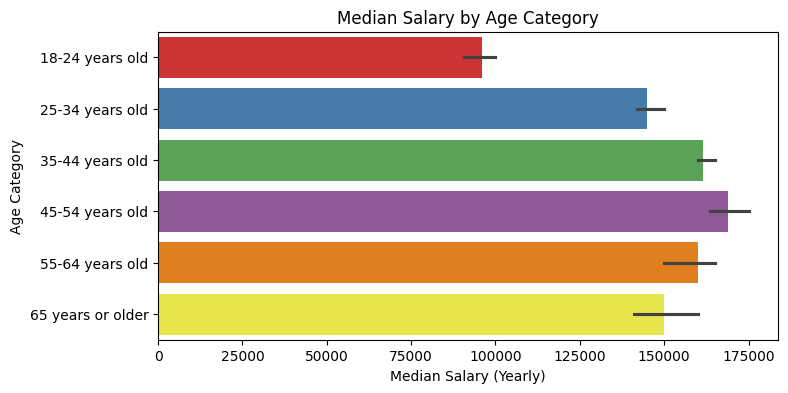

In [81]:
age_order = ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
plt.figure(figsize=(8, 4))
sns.barplot(y='Age', x='ConvertedCompYearly', data=df_usa, estimator='median', errorbar='ci',order = age_order,palette='Set1')
plt.ylabel('Age Category')
plt.xlabel('Median Salary (Yearly)')
plt.title('Median Salary by Age Category')
plt.show()

#### MainBranch

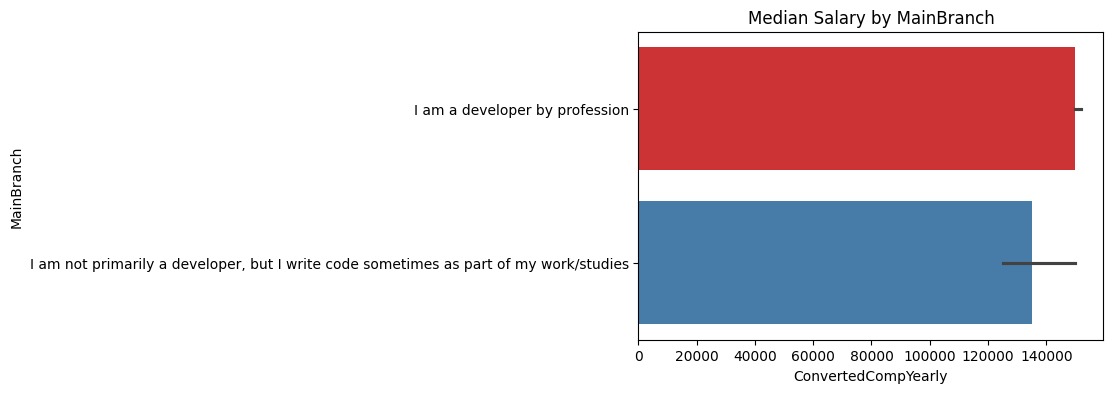

In [82]:
plt.figure(figsize=(6, 4))
sns.barplot(y='MainBranch', x='ConvertedCompYearly',estimator='median', data=df_usa,palette='Set1')
plt.ylabel('MainBranch')
plt.xlabel('ConvertedCompYearly')
plt.title('Median Salary by MainBranch')
plt.show()

#### Employment Type

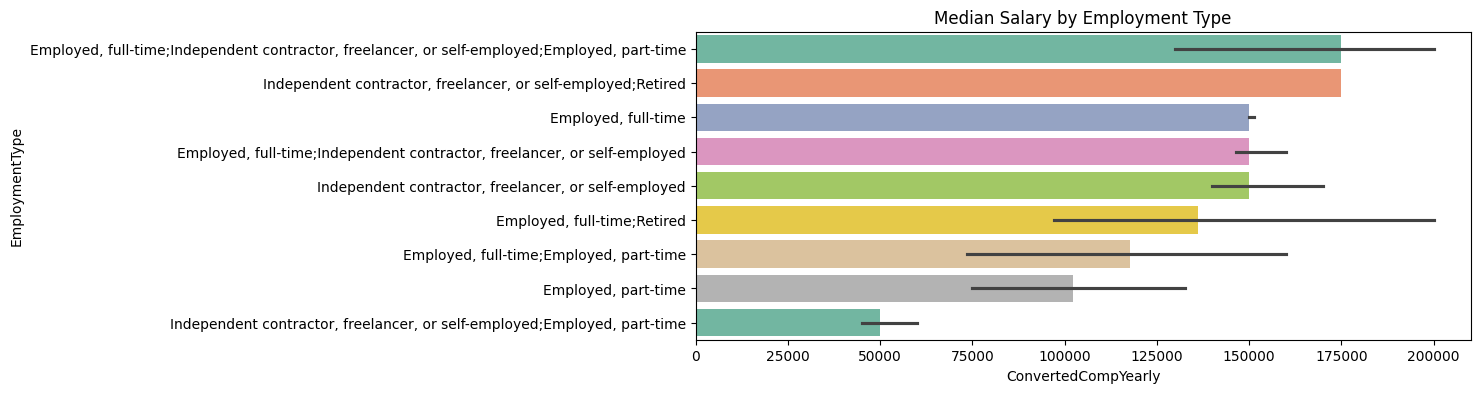

In [83]:
median_salary_by_employment_type = df_usa.groupby('Employment')['ConvertedCompYearly'].median().sort_values(ascending=False).index
plt.figure(figsize=(10, 4))
sns.barplot(y='Employment', x='ConvertedCompYearly',estimator='median', data=df_usa, order = median_salary_by_employment_type,palette='Set2')
plt.ylabel('EmploymentType')
plt.xlabel('ConvertedCompYearly')
plt.title('Median Salary by Employment Type')
plt.show()

#### RemoteWork

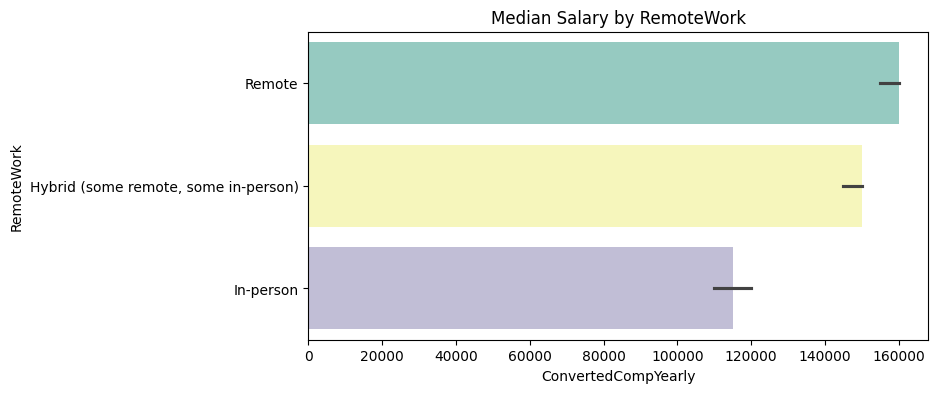

In [85]:
plt.figure(figsize=(8, 4))
sns.barplot(y='RemoteWork', x='ConvertedCompYearly',estimator='median', data=df_usa,palette='Set3')
plt.ylabel('RemoteWork')
plt.xlabel('ConvertedCompYearly')
plt.title('Median Salary by RemoteWork')
plt.show()

#### Education level

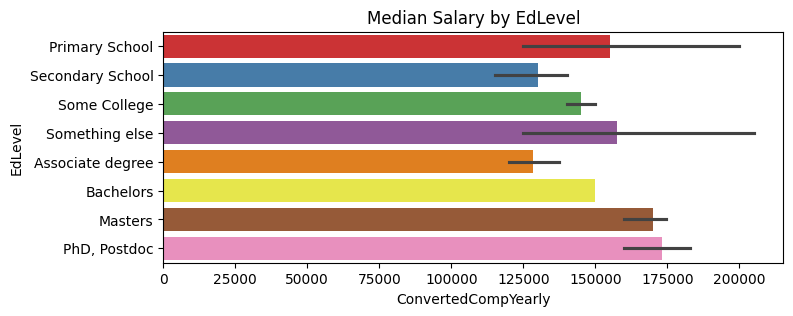

In [86]:
EdLevel_order = ['Primary School', 'Secondary School', 'Some College',  'Something else',
                 'Associate degree', 'Bachelors', 'Masters','PhD, Postdoc']

plt.figure(figsize=(8, 3))
sns.barplot(y='EdLevel', x='ConvertedCompYearly',estimator='median', data=df_usa,order=EdLevel_order,palette='Set1')
plt.ylabel('EdLevel')
plt.xlabel('ConvertedCompYearly')
plt.title('Median Salary by EdLevel')
plt.show()

#### DevType

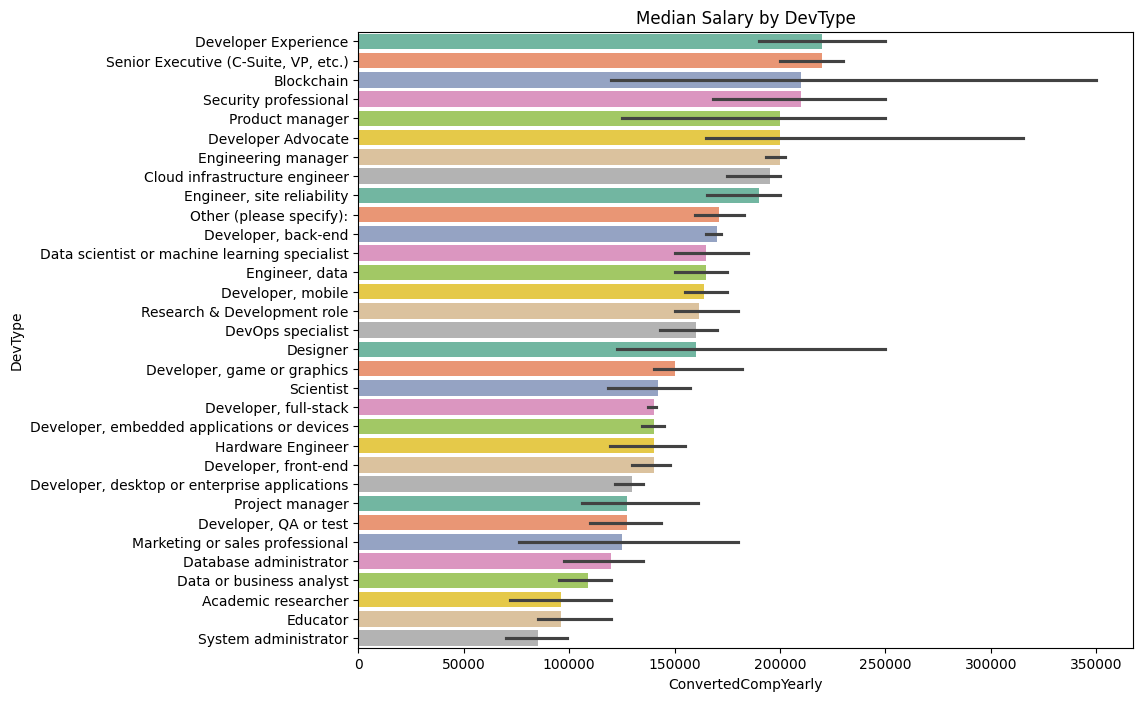

In [87]:
median_salary_by_devtype = df_usa.groupby('DevType')['ConvertedCompYearly'].median().sort_values(ascending=False).index

plt.figure(figsize=(10, 8))
sns.barplot(y='DevType', x='ConvertedCompYearly', estimator='median', data=df_usa, order=median_salary_by_devtype,palette='Set2')
plt.ylabel('DevType')
plt.xlabel('ConvertedCompYearly')
plt.title('Median Salary by DevType')
plt.show()

#### Industry

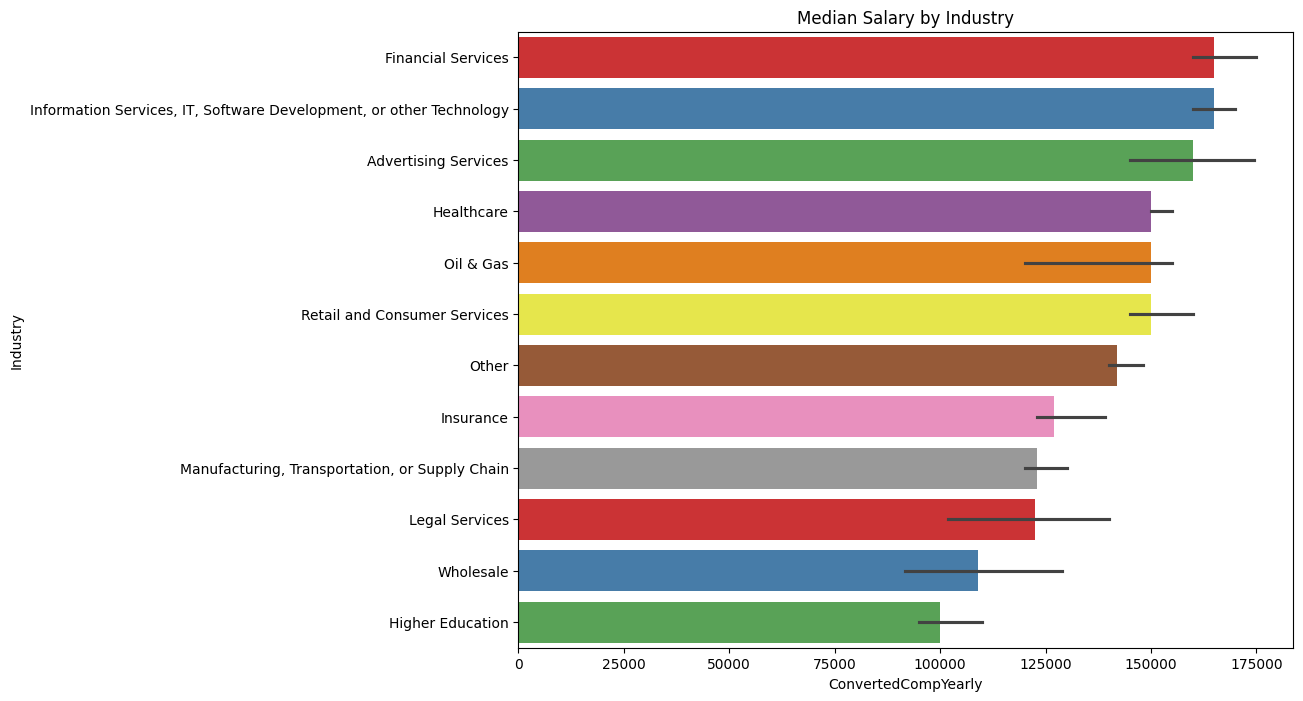

In [88]:
median_salary_by_industry = df_usa.groupby('Industry')['ConvertedCompYearly'].median().sort_values(ascending=False).index

plt.figure(figsize=(10, 8))
sns.barplot(y='Industry', x='ConvertedCompYearly', estimator='median', data=df_usa, order=median_salary_by_industry,palette='Set1')
plt.ylabel('Industry')
plt.xlabel('ConvertedCompYearly')
plt.title('Median Salary by Industry')
plt.show()

#### WorkExp

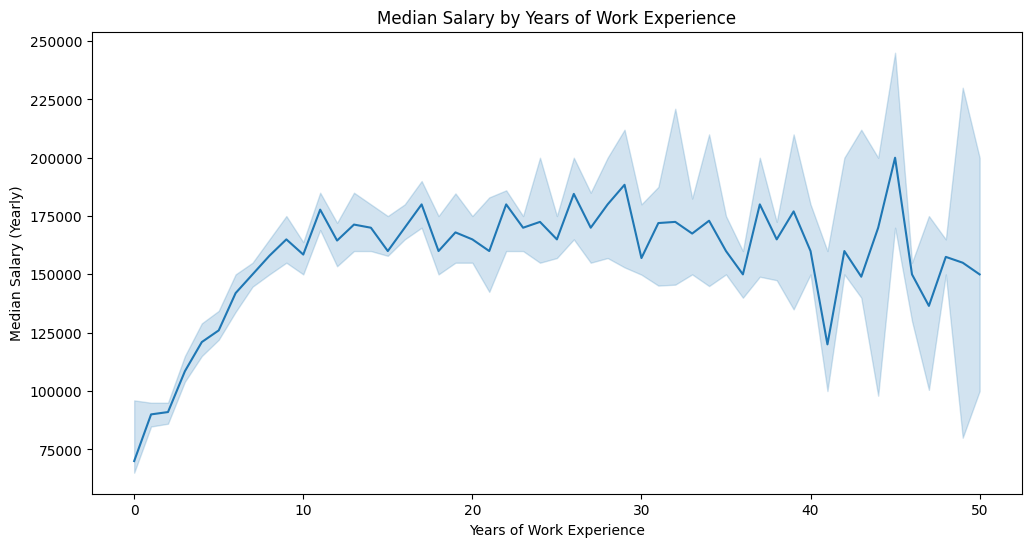

In [89]:
df_usa['WorkExp'] = pd.to_numeric(df_usa['WorkExp'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.lineplot(x='WorkExp', y='ConvertedCompYearly', estimator='median', data=df_usa, errorbar='ci')
plt.xlabel('Years of Work Experience')
plt.ylabel('Median Salary (Yearly)')
plt.title('Median Salary by Years of Work Experience')
plt.show()

#### Years of Professional Coding Experience

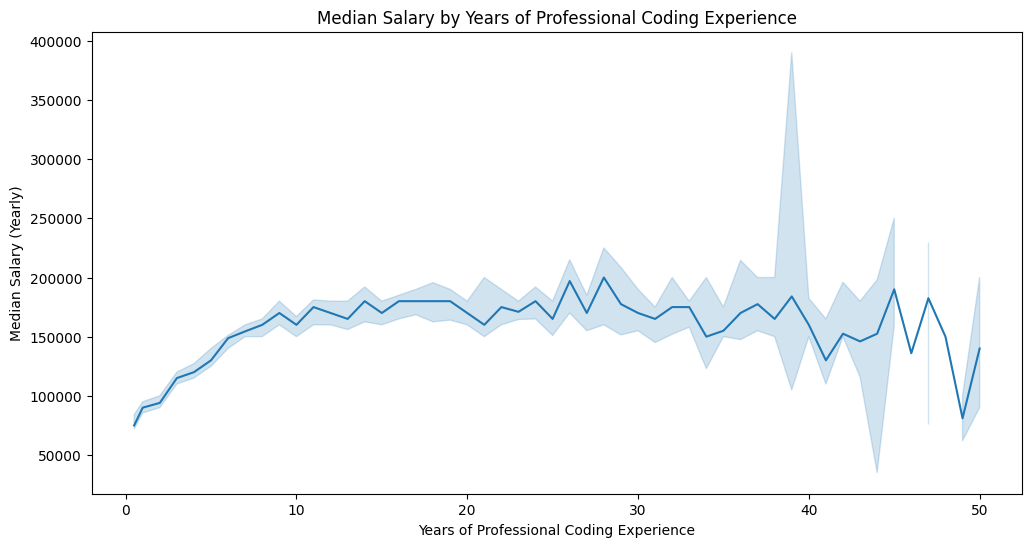

In [90]:
df_usa['YearsCodePro'] = pd.to_numeric(df_usa['YearsCodePro'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.lineplot(x='YearsCodePro', y='ConvertedCompYearly', estimator='median', data=df_usa, errorbar='ci')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Salary (Yearly)')
plt.title('Median Salary by Years of Professional Coding Experience')
plt.show()

In [91]:
df_usa[['WorkExp','YearsCodePro']].corr()

,WorkExp,YearsCodePro
WorkExp,1.000000,0.922842
YearsCodePro,0.922842,1.000000


* We can get rid of either WorkExp (or) YearsCodePro, since they almost reflect the same and are highly correlated.

#### Organizational size

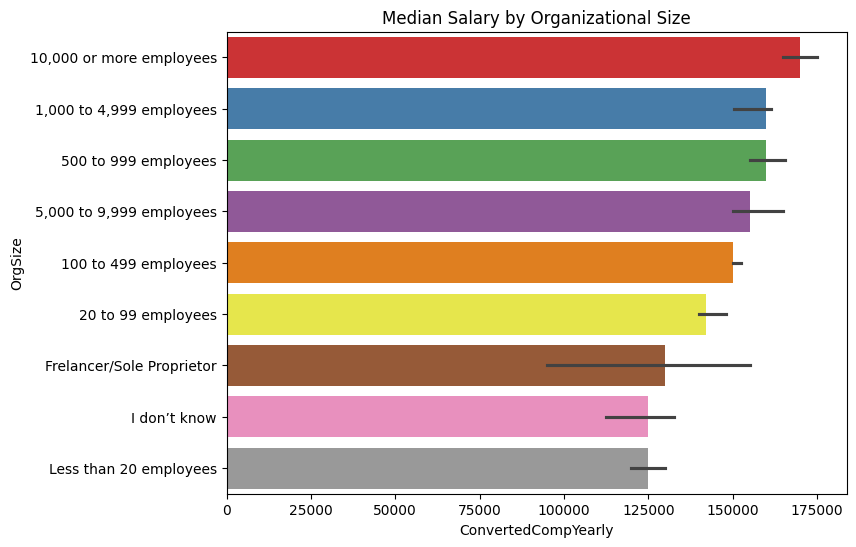

In [92]:
median_salary_by_orgsize = df_usa.groupby('OrgSize')['ConvertedCompYearly'].median().sort_values(ascending=False).index

plt.figure(figsize=(8, 6))
sns.barplot(y='OrgSize', x='ConvertedCompYearly', estimator='median', data=df_usa, order=median_salary_by_orgsize,palette='Set1')
plt.ylabel('OrgSize')
plt.xlabel('ConvertedCompYearly')
plt.title('Median Salary by Organizational Size')
plt.show()

#### Position level

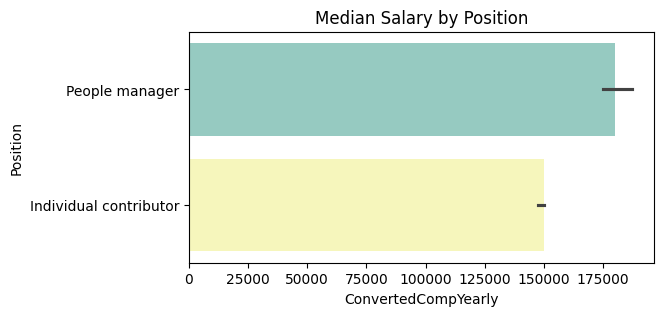

In [93]:
plt.figure(figsize=(6, 3))
sns.barplot(y='ICorPM', x='ConvertedCompYearly',estimator='median', data=df_usa,palette='Set3')
plt.ylabel('Position')
plt.xlabel('ConvertedCompYearly')
plt.title('Median Salary by Position')
plt.show()

### Outlier Analysis

In [95]:
df_oa = df_usa.copy()

In [96]:
for col in df_oa.select_dtypes('object').columns:
    print(df_oa[col].value_counts())
    print("--"*70)

MainBranch
I am a developer by profession                                                           6316
I am not primarily a developer, but I write code sometimes as part of my work/studies     405
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------
Age
25-34 years old       2849
35-44 years old       2089
45-54 years old        823
18-24 years old        516
55-64 years old        367
65 years or older       68
Prefer not to say        8
Under 18 years old       1
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------
Employment
Employed, full-time                                                                             6154
Employed, full-time;Independent contractor, freelancer, or self-employed                         398
Independent contractor, freelancer

In [97]:
employment_statuses = df_oa['Employment'].str.get_dummies(';')
df_oa = pd.concat([df_oa, employment_statuses], axis=1)

df_oa = df_oa[~df_oa['MainBranch'].isin(['I am not primarily a developer, but I write code sometimes as part of my work/studies'])]
df_oa = df_oa[~df_oa['Age'].isin(['Prefer not to say', 'Under 18 years old'])]
df_oa = df_oa[~df_oa['EdLevel'].isin(['Something else'])]
df_oa = df_oa[~df_oa['OrgSize'].isin(["I don’t know", "Frelancer/Sole Proprietor"])]
df_oa = df_oa[df_oa['DevType'].map(df_oa['DevType'].value_counts()) >= 50]
df_oa = df_oa[df_oa['Industry'].map(df_oa['Industry'].value_counts()) >= 50]

In [98]:
for col in df_oa.select_dtypes('object').columns:
    print(df_oa[col].value_counts())
    print("--"*70)

MainBranch
I am a developer by profession    5745
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------
Age
25-34 years old      2490
35-44 years old      1793
45-54 years old       675
18-24 years old       431
55-64 years old       299
65 years or older      57
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------
Employment
Employed, full-time                                                                             5271
Employed, full-time;Independent contractor, freelancer, or self-employed                         329
Independent contractor, freelancer, or self-employed                                              91
Employed, part-time                                                                               23
Employed, full-time;Employed, part-time  

In [99]:
df_oa['ConvertedCompYearly'].describe()

count    5.745000e+03
mean     1.737681e+05
std      1.606286e+05
min      9.100000e+01
25%      1.150000e+05
50%      1.500000e+05
75%      2.000000e+05
max      9.000000e+06
Name: ConvertedCompYearly, dtype: float64

In [100]:
np.percentile(df_oa['ConvertedCompYearly'], 99)

518400.000000006

In [101]:
df_oa[df_oa['ConvertedCompYearly'] >= np.percentile(df_oa['ConvertedCompYearly'],99)]

,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,CompTotal,ConvertedCompYearly,WorkExp,Industry,Currency,OrgSize,ICorPM,"Employed, full-time","Employed, part-time","Independent contractor, freelancer, or self-employed",Retired
770,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Masters,2.0,Data scientist or machine learning specialist,United States of America,9000000.0,9000000.0,2.0,"Manufacturing, Transportation, or Supply Chain",USD\tUnited States dollar,"10,000 or more employees",Individual contributor,1,0,0,0
5026,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Bachelors,15.0,Cloud infrastructure engineer,United States of America,535000.0,535000.0,27.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,"1,000 to 4,999 employees",Individual contributor,1,0,0,0
5158,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Associate degree,5.0,Cloud infrastructure engineer,United States of America,800000.0,800000.0,25.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,"1,000 to 4,999 employees",Individual contributor,1,0,0,0
7105,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Bachelors,9.0,Engineering manager,United States of America,1000000.0,1000000.0,10.0,Financial Services,USD\tUnited States dollar,"1,000 to 4,999 employees",People manager,1,0,0,0
7797,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Masters,3.0,"Engineer, data",United States of America,650000.0,650000.0,3.0,Financial Services,USD\tUnited States dollar,500 to 999 employees,Individual contributor,1,0,0,0
8506,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Some College,8.0,DevOps specialist,United States of America,800000.0,800000.0,8.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,100 to 499 employees,Individual contributor,1,0,0,0
8631,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Masters,3.0,"Developer, back-end",United States of America,600000.0,600000.0,18.0,Financial Services,USD\tUnited States dollar,"1,000 to 4,999 employees",Individual contributor,1,0,0,0
8920,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Bachelors,20.0,Cloud infrastructure engineer,United States of America,800000.0,800000.0,20.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,"10,000 or more employees",Individual contributor,1,0,0,0
8992,I am a developer by profession,25-34 years old,"Independent contractor, freelancer, or self-em...",Remote,Masters,5.0,Data scientist or machine learning specialist,United States of America,600000.0,600000.0,5.0,Other,USD\tUnited States dollar,Less than 20 employees,Individual contributor,0,0,1,0
12993,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,"PhD, Postdoc",23.0,Other (please specify):,United States of America,1000000.0,1000000.0,23.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,Less than 20 employees,Individual contributor,0,0,1,0


<Axes: xlabel='ConvertedCompYearly', ylabel='Count'>

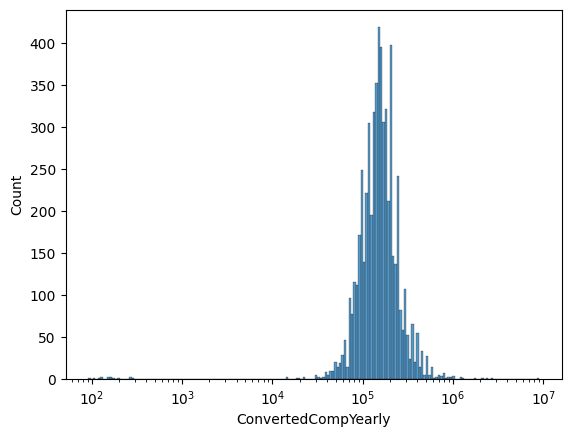

In [102]:
sns.histplot(data = df_oa, x = 'ConvertedCompYearly',log_scale=True)

In [103]:
df_oa = df_oa[(df_oa['ConvertedCompYearly'] >= 40000) & (df_oa['ConvertedCompYearly'] <= 518400)]

<Axes: xlabel='ConvertedCompYearly', ylabel='Count'>

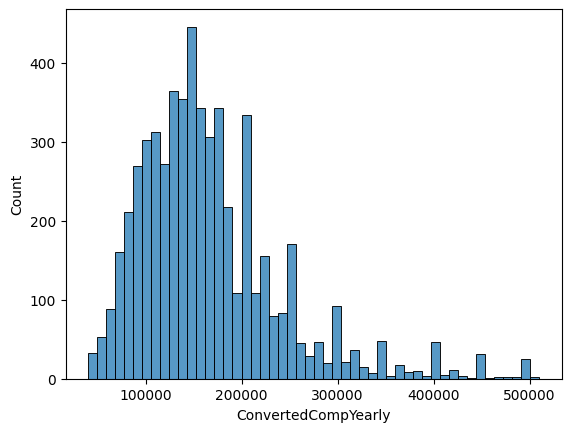

In [104]:
sns.histplot(data = df_oa, x = df_oa['ConvertedCompYearly'])

In [105]:
# Define quantiles
quantiles = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Define bin labels
bin_labels = ['Low', 'Low-Mid', 'Mid', 'Mid-High', 'High']

# Create a new column 'SalaryBracket'
df_oa['SalaryBracket'] = pd.qcut(df_oa['ConvertedCompYearly'], q=quantiles, labels=bin_labels)

# Create a dictionary to map bin labels to actual salary ranges
bin_ranges = {label: (df_oa.loc[df_oa['SalaryBracket'] == label, 'ConvertedCompYearly'].min(), df_oa.loc[df_oa['SalaryBracket'] == label, 'ConvertedCompYearly'].max()) for label in bin_labels}

# Now, the 'bin_ranges' should provide the correct mapping of bin labels to salary ranges
bin_ranges

{'Low': (40000.0, 107000.0),
 'Low-Mid': (107325.0, 140000.0),
 'Mid': (140400.0, 170000.0),
 'Mid-High': (170100.0, 210000.0),
 'High': (210980.0, 510000.0)}

### Encoding

In [106]:
df_encoding = df_oa.copy()
df_encoding.head()

,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,CompTotal,ConvertedCompYearly,WorkExp,Industry,Currency,OrgSize,ICorPM,"Employed, full-time","Employed, part-time","Independent contractor, freelancer, or self-employed",Retired,SalaryBracket
1,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Bachelors,9.0,"Senior Executive (C-Suite, VP, etc.)",United States of America,285000.0,285000.0,10.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,Less than 20 employees,People manager,1,0,0,0,High
2,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Bachelors,23.0,"Developer, back-end",United States of America,250000.0,250000.0,23.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,"5,000 to 9,999 employees",Individual contributor,1,0,0,0,High
6,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some College,3.0,"Developer, full-stack",United States of America,135000.0,135000.0,4.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,"1,000 to 4,999 employees",Individual contributor,1,0,0,0,Low-Mid
12,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Bachelors,9.0,"Developer, full-stack",United States of America,75000.0,75000.0,9.0,Other,USD\tUnited States dollar,Less than 20 employees,Individual contributor,1,0,0,0,Low
36,I am a developer by profession,55-64 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Some College,15.0,"Developer, full-stack",United States of America,130000.0,130000.0,39.0,"Manufacturing, Transportation, or Supply Chain",USD\tUnited States dollar,100 to 499 employees,Individual contributor,1,0,0,0,Low-Mid


In [107]:
cols_to_drop = ['MainBranch','Country','CompTotal','WorkExp','Currency','Employment']

df_encoding = df_encoding.drop(cols_to_drop,axis = 1).reset_index(drop = True)

In [108]:
df_encoding.head()

,Age,RemoteWork,EdLevel,YearsCodePro,DevType,ConvertedCompYearly,Industry,OrgSize,ICorPM,"Employed, full-time","Employed, part-time","Independent contractor, freelancer, or self-employed",Retired,SalaryBracket
0,25-34 years old,Remote,Bachelors,9.0,"Senior Executive (C-Suite, VP, etc.)",285000.0,"Information Services, IT, Software Development...",Less than 20 employees,People manager,1,0,0,0,High
1,45-54 years old,"Hybrid (some remote, some in-person)",Bachelors,23.0,"Developer, back-end",250000.0,"Information Services, IT, Software Development...","5,000 to 9,999 employees",Individual contributor,1,0,0,0,High
2,35-44 years old,Remote,Some College,3.0,"Developer, full-stack",135000.0,"Information Services, IT, Software Development...","1,000 to 4,999 employees",Individual contributor,1,0,0,0,Low-Mid
3,25-34 years old,Remote,Bachelors,9.0,"Developer, full-stack",75000.0,Other,Less than 20 employees,Individual contributor,1,0,0,0,Low
4,55-64 years old,"Hybrid (some remote, some in-person)",Some College,15.0,"Developer, full-stack",130000.0,"Manufacturing, Transportation, or Supply Chain",100 to 499 employees,Individual contributor,1,0,0,0,Low-Mid


In [109]:
df_encoding['EdLevel'].unique()

array(['Bachelors', 'Some College', 'Masters', 'Secondary School',
       'Associate degree', 'PhD, Postdoc', 'Primary School'], dtype=object)

In [110]:
categorical_columns = ['Age', 'RemoteWork', 'EdLevel', 'DevType', 'Industry', 'OrgSize', 'ICorPM']

for col in categorical_columns:
    df_encoding[col] = df_encoding[col].astype('category')

In [111]:
from sklearn.preprocessing import LabelEncoder

## Label Encoding Age
le_age = LabelEncoder()
df_encoding.loc[:,'Age'] = le_age.fit_transform(df_encoding['Age'])

## Label Encoding RemoteWork
le_RemoteWork = LabelEncoder()
df_encoding.loc[:,'RemoteWork'] = le_RemoteWork.fit_transform(df_encoding['RemoteWork'])

## Ordinal Encoding Education level
education_level_map = {'Primary School' : 0, 'Secondary School' : 1, 'Some College' : 2, 'Associate degree' : 3,
                       'Bachelors' : 4, 'Masters' : 5, 'PhD, Postdoc' : 6}
df_encoding.loc[:,'EdLevel'] = df_encoding['EdLevel'].map(education_level_map)

## Label Encoding Developer Title
le_DevType = LabelEncoder()
df_encoding.loc[:,'DevType'] = le_DevType.fit_transform(df_encoding['DevType'])

## Label Encoding Industry
le_Industry = LabelEncoder()
df_encoding.loc[:,'Industry'] = le_Industry.fit_transform(df_encoding['Industry'])

## Label Encoding OrgSize
le_OrgSize = LabelEncoder()
df_encoding.loc[:,'OrgSize'] = le_OrgSize.fit_transform(df_encoding['OrgSize'])

## Label Encoding ICorPM
le_ICorPM = LabelEncoder()
df_encoding.loc[:,'ICorPM'] = le_ICorPM.fit_transform(df_encoding['ICorPM'])

In [112]:
df_encoding.head()

,Age,RemoteWork,EdLevel,YearsCodePro,DevType,ConvertedCompYearly,Industry,OrgSize,ICorPM,"Employed, full-time","Employed, part-time","Independent contractor, freelancer, or self-employed",Retired,SalaryBracket
0,1,2,4,9.0,14,285000.0,4,6,1,1,0,0,0,High
1,3,0,4,23.0,3,250000.0,4,4,0,1,0,0,0,High
2,2,2,2,3.0,7,135000.0,4,0,0,1,0,0,0,Low-Mid
3,1,2,4,9.0,7,75000.0,7,6,0,1,0,0,0,Low
4,4,0,2,15.0,7,130000.0,6,2,0,1,0,0,0,Low-Mid


In [113]:
salary_mapping = {'Low': 0, 'Low-Mid': 1, 'Mid': 2, 'Mid-High': 3, 'High': 4}
df_encoding['SalaryBracketEncoded'] = df_encoding['SalaryBracket'].map(salary_mapping)

In [114]:
df_encoding.head()

,Age,RemoteWork,EdLevel,YearsCodePro,DevType,ConvertedCompYearly,Industry,OrgSize,ICorPM,"Employed, full-time","Employed, part-time","Independent contractor, freelancer, or self-employed",Retired,SalaryBracket,SalaryBracketEncoded
0,1,2,4,9.0,14,285000.0,4,6,1,1,0,0,0,High,4
1,3,0,4,23.0,3,250000.0,4,4,0,1,0,0,0,High,4
2,2,2,2,3.0,7,135000.0,4,0,0,1,0,0,0,Low-Mid,1
3,1,2,4,9.0,7,75000.0,7,6,0,1,0,0,0,Low,0
4,4,0,2,15.0,7,130000.0,6,2,0,1,0,0,0,Low-Mid,1


In [115]:
df_model = df_encoding.copy()

In [116]:
X = df_model.drop(['ConvertedCompYearly','SalaryBracket','SalaryBracketEncoded'],axis = 1)
y = df_model['SalaryBracketEncoded']

In [117]:
X = X.drop(['Employed, full-time','Employed, part-time','Independent contractor, freelancer, or self-employed','Retired'],axis = 1)

### Splitting into train and test sets

In [118]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

### Modeling

#### Helper functions to fit the model, compute the results and feature importances.

In [120]:
from sklearn.metrics import accuracy_score, classification_report

In [121]:
def fit_and_compute_results(model):
    model.fit(X_train,y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print(f"Training Accuracy is : {accuracy_score(y_train,y_pred_train)}\n")
    print(f"Testing Accuracy is : {accuracy_score(y_test,y_pred)}\n")
    print("--" * 50)
    
    print(f"Classification report w.r.t the train set:\n {classification_report(y_train,y_pred_train)}\n")
    print("--" * 50)
    print(f"Classification report w.r.t the test set:\n {classification_report(y_test,y_pred)}\n")

In [122]:
def plot_feature_importances(model):
    plt.figure(figsize = (6,4))
    feature_importances_df = pd.DataFrame({'features' : X.columns,
                                    'feature_importances' : model.feature_importances_}).sort_values('feature_importances',ascending=False)
    sns.barplot(data = feature_importances_df, y = 'features', x = 'feature_importances', hue = 'feature_importances')
    plt.show()

#### Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
fit_and_compute_results(lr)

Training Accuracy is : 0.3292035398230089

Testing Accuracy is : 0.32360742705570295

----------------------------------------------------------------------------------------------------
Classification report w.r.t the train set:
               precision    recall  f1-score   support

           0       0.42      0.65      0.51       908
           1       0.27      0.30      0.29       995
           2       0.26      0.13      0.17       904
           3       0.27      0.16      0.20       853
           4       0.33      0.40      0.36       860

    accuracy                           0.33      4520
   macro avg       0.31      0.33      0.31      4520
weighted avg       0.31      0.33      0.31      4520


----------------------------------------------------------------------------------------------------
Classification report w.r.t the test set:
               precision    recall  f1-score   support

           0       0.42      0.64      0.51       228
           1       0.22   

#### Decision Tree Classifier

In [127]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
fit_and_compute_results(tree)

Training Accuracy is : 0.95

Testing Accuracy is : 0.3050397877984085

----------------------------------------------------------------------------------------------------
Classification report w.r.t the train set:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       908
           1       0.92      0.96      0.94       995
           2       0.95      0.94      0.94       904
           3       0.97      0.93      0.95       853
           4       0.99      0.92      0.96       860

    accuracy                           0.95      4520
   macro avg       0.95      0.95      0.95      4520
weighted avg       0.95      0.95      0.95      4520


----------------------------------------------------------------------------------------------------
Classification report w.r.t the test set:
               precision    recall  f1-score   support

           0       0.44      0.46      0.45       228
           1       0.28      0.29      0.

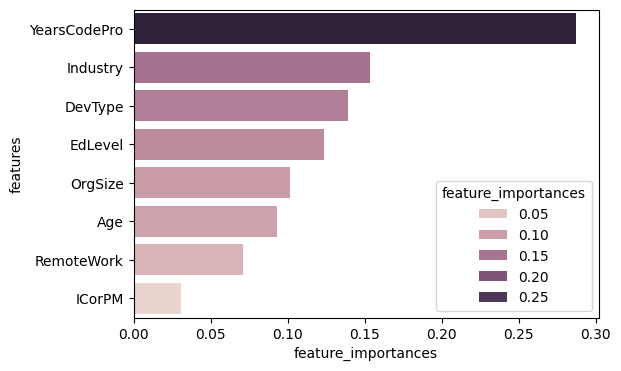

In [128]:
plot_feature_importances(tree)

#### Random Forest Classifier

In [129]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
fit_and_compute_results(rf)

Training Accuracy is : 0.95

Testing Accuracy is : 0.34748010610079577

----------------------------------------------------------------------------------------------------
Classification report w.r.t the train set:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       908
           1       0.94      0.95      0.94       995
           2       0.94      0.94      0.94       904
           3       0.95      0.95      0.95       853
           4       0.95      0.96      0.96       860

    accuracy                           0.95      4520
   macro avg       0.95      0.95      0.95      4520
weighted avg       0.95      0.95      0.95      4520


----------------------------------------------------------------------------------------------------
Classification report w.r.t the test set:
               precision    recall  f1-score   support

           0       0.52      0.58      0.55       228
           1       0.29      0.29      0

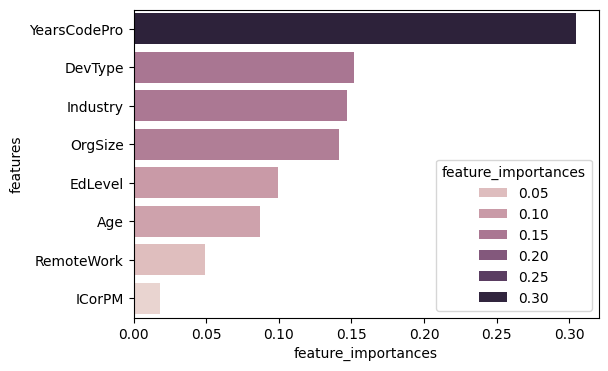

In [130]:
plot_feature_importances(rf)

#### Gradient Boosting Classifier

In [131]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

fit_and_compute_results(gbc)

Training Accuracy is : 0.4188053097345133

Testing Accuracy is : 0.3863837312113174

----------------------------------------------------------------------------------------------------
Classification report w.r.t the train set:
               precision    recall  f1-score   support

           0       0.58      0.61      0.59       908
           1       0.35      0.39      0.37       995
           2       0.32      0.22      0.26       904
           3       0.33      0.29      0.31       853
           4       0.45      0.59      0.51       860

    accuracy                           0.42      4520
   macro avg       0.41      0.42      0.41      4520
weighted avg       0.41      0.42      0.41      4520


----------------------------------------------------------------------------------------------------
Classification report w.r.t the test set:
               precision    recall  f1-score   support

           0       0.53      0.60      0.56       228
           1       0.29    

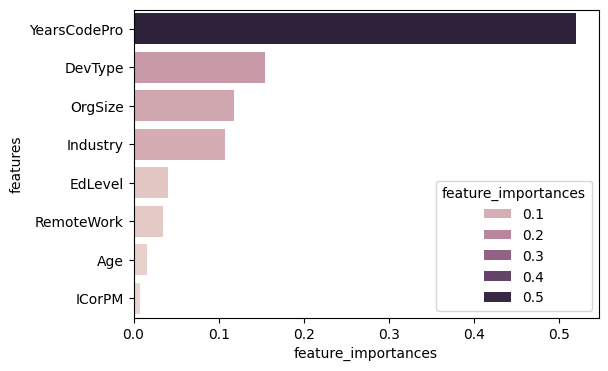

In [132]:
plot_feature_importances(gbc)

#### LightGBM Classifier

In [133]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

In [134]:
lgb_model = lgb.LGBMClassifier()
# Fit and compute results
fit_and_compute_results(lgb_model)

python(93667) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 99
[LightGBM] [Info] Number of data points in the train set: 4520, number of used features: 8
[LightGBM] [Info] Start training from score -1.605023
[LightGBM] [Info] Start training from score -1.513525
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.667508
[LightGBM] [Info] Start training from score -1.659335
Training Accuracy is : 0.6918141592920354

Testing Accuracy is : 0.34748010610079577

----------------------------------------------------------------------------------------------------
Classification report w.r.t the train set:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       908
           1       0.65      0.66      0.66       995
           2       0.68      0.60      0.64       9

#### Hybrid Classifier

In [138]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

hybrid_classifier = VotingClassifier(estimators=[
        ('rf', rf), ('gbc',gbc), 
        ('lgb',lgb_model), ('tree',tree)], voting='hard')

fit_and_compute_results(hybrid_classifier)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 99
[LightGBM] [Info] Number of data points in the train set: 4520, number of used features: 8
[LightGBM] [Info] Start training from score -1.605023
[LightGBM] [Info] Start training from score -1.513525
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.667508
[LightGBM] [Info] Start training from score -1.659335
Training Accuracy is : 0.861283185840708

Testing Accuracy is : 0.35013262599469497

----------------------------------------------------------------------------------------------------
Classification report w.r.t the train set:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88       908
           1       0.80      0.86      0.83       995
           2       0.89      0.80      0.84       90

### Hyper Parameter Optimization

In [ ]:
# 1) Logistic Regression
logistic_model = LogisticRegression()
logistic_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}
logistic_grid_search = GridSearchCV(estimator=logistic_model, param_grid=logistic_param_grid, scoring='accuracy', cv=5)
logistic_grid_search.fit(X_train, y_train)
best_logistic_model = logistic_grid_search.best_estimator_
logistic_test_accuracy = accuracy_score(y_test, best_logistic_model.predict(X_test))
print("Testing Accuracy for Best Logistic Regression Model:", logistic_test_accuracy)


In [ ]:
# 2) Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, scoring='accuracy', cv=5)
dt_grid_search.fit(X_train, y_train)
best_dt_model = dt_grid_search.best_estimator_
dt_test_accuracy = accuracy_score(y_test, best_dt_model.predict(X_test))
print("Testing Accuracy for Best Decision Tree Classifier:", dt_test_accuracy)

In [ ]:
# 3) Random Forest Classifier
rf_model = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, scoring='accuracy', cv=5)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
rf_test_accuracy = accuracy_score(y_test, best_rf_model.predict(X_test))
print("Testing Accuracy for Best Random Forest Classifier:", rf_test_accuracy)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# 4) Adaboost
adaboost_model = AdaBoostClassifier()
adaboost_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1]
}
adaboost_grid_search = GridSearchCV(estimator=adaboost_model, param_grid=adaboost_param_grid, scoring='accuracy', cv=5)
adaboost_grid_search.fit(X_train, y_train)
best_adaboost_model = adaboost_grid_search.best_estimator_
adaboost_test_accuracy = accuracy_score(y_test, best_adaboost_model.predict(X_test))
print("Testing Accuracy for Best Adaboost Classifier:", adaboost_test_accuracy)

In [ ]:
# 5) Gradient Boost
gradient_boost_model = GradientBoostingClassifier()
gradient_boost_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'max_depth': [3, 5, 7]
}
gradient_boost_grid_search = GridSearchCV(estimator=gradient_boost_model, param_grid=gradient_boost_param_grid, scoring='accuracy', cv=5)
gradient_boost_grid_search.fit(X_train, y_train)
best_gradient_boost_model = gradient_boost_grid_search.best_estimator_
gradient_boost_test_accuracy = accuracy_score(y_test, best_gradient_boost_model.predict(X_test))
print("Testing Accuracy for Best Gradient Boost Classifier:", gradient_boost_test_accuracy)

In [ ]:
# 6) XGBoost
xgb_model = XGBClassifier()
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
}
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, scoring='accuracy', cv=5)
xgb_grid_search.fit(X_train, y_train)
best_xgb_model = xgb_grid_search.best_estimator_
xgb_test_accuracy = accuracy_score(y_test, best_xgb_model.predict(X_test))
print("Testing Accuracy for Best XGBoost Classifier:", xgb_test_accuracy)

In [ ]:
# 7) LightGBM
lgbm_model = LGBMClassifier()
lgbm_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'max_depth': [3, 5, 7]
}
lgbm_grid_search = GridSearchCV(estimator=lgbm_model, param_grid=lgbm_param_grid, scoring='accuracy', cv=5)
lgbm_grid_search.fit(X_train, y_train)
best_lgbm_model = lgbm_grid_search.best_estimator_
lgbm_test_accuracy = accuracy_score(y_test, best_lgbm_model.predict(X_test))
print("Testing Accuracy for Best LightGBM Classifier:", lgbm_test_accuracy)

In [ ]:
# 8) SVM
svm_model = SVC()
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, scoring='accuracy', cv=5)
svm_grid_search.fit(X_train, y_train)
best_svm_model = svm_grid_search.best_estimator_
svm_test_accuracy = accuracy_score(y_test, best_svm_model.predict(X_test))
print("Testing Accuracy for Best SVM Classifier:", svm_test_accuracy)